## Name: Austun Louw

## Note that some of my code was found on the internet

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#functions 
def f1(x,y):
    return x**2 + y**2

def f2(x,y):
    return x**2 * y

def f3(r,theta):
    return r * np.sin(theta)*np.sin(theta)
    
def f4(x,y):
    return x * y *np.sqrt(x**2 + y**2) 

In [3]:
def leading(a,k,n):
    return a*(1/n)**k

In [4]:
#midpoint function for double integrals
#f is the function
#a is the start point/ first point for the x data points
#b is the last point for the x data points
#c is the start point/ first point for the y data points
#d is the last point for the y data points
#n is the number of rectangles/sub-intervals
#code reference is found in latex file

def midpoint_solution(f, a, b, c, d , nx, ny):
    hx = float(b-a)/nx
    hy = float(d-c)/ny
    result = 0
    for i in range(nx):
        for j in range(ny):
            xi = a + 0.5*hx + i*hx                        #getting the next x value
            yj = c + 0.5*hy + j*hy                        #getting the next y value
            result += hx*hy*f(xi, yj)                     #summing up the area under the curve
            
    return result


In [5]:
#trapeziodal function for double integrals

def trapezoidal_solution(f,a,b,c,d,nx,ny):
    hx = (b-a)/float(nx)
    hy = (d-c)/float(ny)
    
    result = 0.25*(f(a,c) + f(a,d) + f(b,c) + f(b,d))
    
    #getting the initial and final point of x and y for both inner and outer integrals at each n
    for i in range(1,nx):
        xi = a + i*hx
        yj = c + i*hy
        result += 0.5*(f(xi,c) + f(xi,d) + f(a,yj) + f(b, yj))
    
    for k in range(1,nx):
        for l in range(1,ny):
            xi = a + k*hx
            yj = c + l*hy
            result += f(xi,yj)
    result *= hx*hy
    
    return result


In [6]:
#website of the code I used to do double simpsons
#https://stackoverflow.com/questions/71356713/double-integral-simpsons-rule-in-python-where-the-limits-are-functions

def simpsons_double(f, a, b, c, d , n):

    if n % 2 != 0:
        sys.exit("We require an even number of strips in Simpson's rule.")

        #getting the range for x and y
    xrange = np.linspace(a,b,n+1)
    yrange = np.linspace(c,d,n+1)

    hx = (b-a)/n #step size of x
    hy = (d-c)/n #step size of y

        #Set temporary weights in each coordinate direction
    weights = np.ones(n+1)
    weights[0] = 1/3
    weights[n] = 1/3

    for w in range (1,n):
        if w % 2 != 0:
            weights[w] = 4/3
        elif w % 2 == 0:
            weights[w] = 2/3

        #Scale with the mesh width in each direction to obtain actual weights
    x_weights = hx*weights
    y_weights = hy*weights

    integral = 0.0 #Initialise the approximation

    for i in range(n+1): #Loop over points in x-direction
        xi = xrange[i] 
        for j in range(n+1): #Loop over points in y-direction 
            yj = yrange[j]

                #Update the approximation
            integral += x_weights[i]*y_weights[j]*f(xi,yj)

    return integral


In [7]:
def error(f, a, b, c, d, exact, n, method):
    error = []
    i = 1
    if method == 'trapezoidal':
        while i <= (n):
            numerical = trapezoidal_solution(f,a,b,c,d,i,i)
            error.append(np.abs(numerical - exact))
            i+=1
        
    elif method == 'midpoint':
        while i <= (n):
            numerical = midpoint_solution(f,a,b,c,d,i,i)
            error.append(np.abs(numerical - exact))
            i+=1
            
    elif method == 'simpson':
        while i <= (n):
            numerical = simpsons_double(f,a,b,c,d,2*i)
            error.append(np.abs(numerical - exact))
            i+=1
    
    return error

# midpoint solutions and error plots of all functions above

In [8]:
solution1 = midpoint_solution(f1, 0, 1, 0, 1, 10, 10)
print("Solution for f1", solution1)
#print(error)

solution2 = midpoint_solution(f2, 0, 3, 1, 2, 10, 10)
print("Solution for f2", solution2)

solution3 = midpoint_solution(f3, 0, 2, 0, np.pi, 10, 10)
print("Solution for f3", solution3)

solution4 = midpoint_solution(f4, 0, 1, 0, 1, 10, 10)
print("Solution for f4", solution4)


Solution for f1 0.6650000000000003
Solution for f2 13.46625
Solution for f3 3.1415926535897936
Solution for f4 0.24321401804734635


In [9]:
#Errors
error1 = error(f1,0,1,0,1,2/3,10, 'midpoint')
error2 = error(f2,0,3,1,2,27/2,10, 'midpoint')
error3 = error(f3,0,2,0,np.pi,np.pi,10, 'midpoint')
error4 = error(f4,0,1,0,1,2/15 *(2*np.sqrt(2) -1),10, 'midpoint')

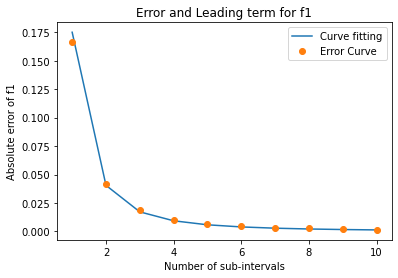

In [10]:
#plotting error graphs
n = np.linspace(1,10,10)
plt.plot(n, leading(0.175,2.1111,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error1, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f1')
plt.title('Error and Leading term for f1')
plt.legend()
plt.savefig('midpoint_f1')
plt.show()

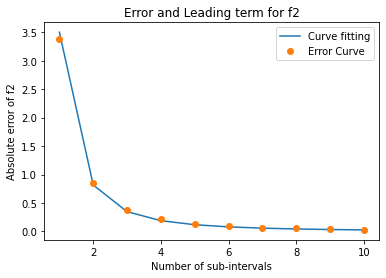

In [11]:
#plotting error graphs
n = np.linspace(1,10,10)
plt.plot(n, leading(3.5,2.1,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error2, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f2')
plt.title('Error and Leading term for f2')
plt.legend()
plt.savefig('midpoint_f2')
plt.show()

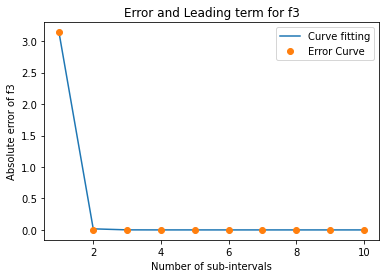

In [12]:
#plotting error graphs
n = np.linspace(1,10,10)
plt.plot(n, leading(3.1,7.5,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error3, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f3')
plt.title('Error and Leading term for f3')
plt.legend()
plt.savefig('midpoint_f3')
plt.show()

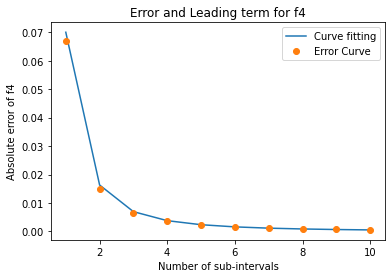

In [13]:
#plotting error graphs
n = np.linspace(1,10,10)
plt.plot(n, leading(0.07,2.1,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error4, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f4')
plt.title('Error and Leading term for f4')
plt.legend()
plt.savefig('midpoint_f4')
plt.show()

# Trapezoidal double integral and error plot of all functions above

In [14]:
test11 = trapezoidal_solution(f1, 0, 1, 0, 1, 10, 10)
print("Solution for f1", test11)

test22 = trapezoidal_solution(f2, 0, 3, 1, 2, 10, 10)
print("Solution for f2", test22)

test33 = trapezoidal_solution(f3, 0, 2, 0, np.pi, 10, 10)
print("Solution for f3", test33)

test44 = trapezoidal_solution(f4, 0, 1, 0, 1, 10, 10)
print("Solution for f4", test44)

Solution for f1 0.6700000000000003
Solution for f2 13.567499999999999
Solution for f3 3.1415926535897953
Solution for f4 0.24494060219655456


In [15]:
#Error for n=1,...,10
error11 = error(f1,0,1,0,1,2/3,10, 'trapezoidal')
error22 = error(f2,0,3,1,2,27/2,10, 'trapezoidal')
error33 = error(f3,0,2,0,np.pi,np.pi,10, 'trapezoidal')
error44 = error(f4,0,1,0,1,2/15 *(2*np.sqrt(2) -1),10, 'trapezoidal')


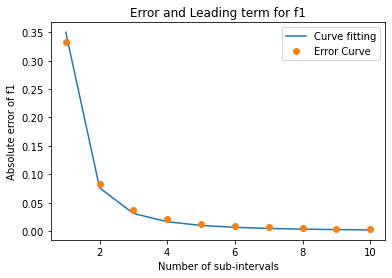

In [16]:
#plotting error graphs
n = np.linspace(1,10,10)
plt.plot(n, leading(0.35,2.2,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error11, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f1')
plt.title('Error and Leading term for f1')
plt.legend()
plt.savefig('trapezoidal_f1')
plt.show()

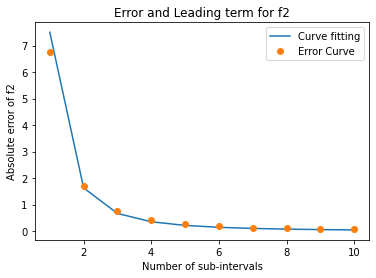

In [17]:
n = np.linspace(1,10,10)
plt.plot(n, leading(7.5,2.2,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error22, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f2')
plt.title('Error and Leading term for f2')
plt.legend()
plt.savefig('trapezoidal_f2')
plt.show()

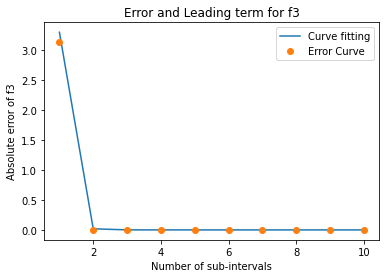

In [18]:
n = np.linspace(1,10,10)
plt.plot(n, leading(3.3,7.5,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error33, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f3')
plt.title('Error and Leading term for f3')
plt.legend()
plt.savefig('trapezoidal_f3')
plt.show()

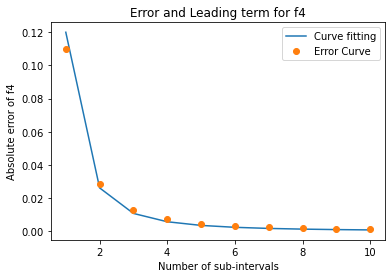

In [19]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.12,2.2,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error44, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f4')
plt.title('Error and Leading term for f4')
plt.legend()
plt.savefig('trapezoidal_f4')
plt.show()

# Simpson's rule

In [20]:
solution1 = simpsons_double(f1, 0, 1, 0, 1, 10)
print("Solution for f1", solution1)
#print(error)

solution2 = simpsons_double(f2, 0, 3, 1, 2, 10)
print("Solution for f2", solution2)

solution3 = simpsons_double(f3, 0, 2, 0, np.pi, 10)
print("Solution for f3", solution3)

solution4 = simpsons_double(f4, 0, 1, 0, 1, 10)
print("Solution for f4", solution4)


Solution for f1 0.6666666666666664
Solution for f2 13.499999999999998
Solution for f3 3.1415926535897927
Solution for f4 0.2437870902437615


In [21]:
#absolute error of double simpson's method
error1 = error(f1,0,1,0,1,2/3,10, 'simpson')
error2 = error(f2,0,3,1,2,27/2,10, 'simpson')
error3 = error(f3,0,2,0,np.pi,np.pi,10, 'simpson')
error4 = error(f4,0,1,0,1,2/15 *(2*np.sqrt(2) -1),10, 'simpson')

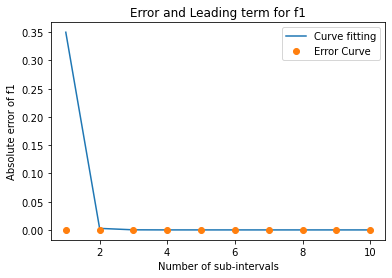

In [22]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.35,7,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error1, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f1')
plt.title('Error and Leading term for f1')
plt.legend()
plt.savefig('simpsons_f1')
plt.show()

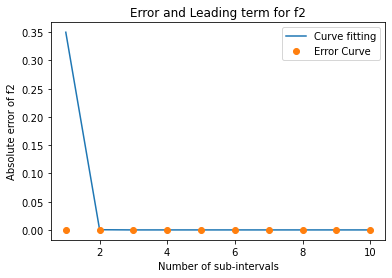

In [23]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.35,10,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error2, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f2')
plt.title('Error and Leading term for f2')
plt.legend()
plt.savefig('simpsons_f2')
plt.show()

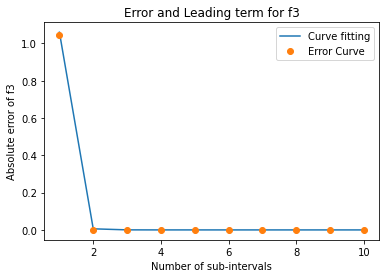

In [24]:
n = np.linspace(1,10,10)
plt.plot(n, leading(1.06,7.5,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error3, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f3')
plt.title('Error and Leading term for f3')
plt.legend()
plt.savefig('simpsons_f3')
plt.show()

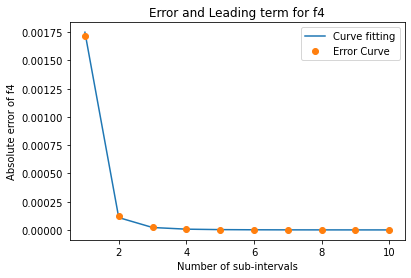

In [25]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.00175,4,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), error4, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of f4')
plt.title('Error and Leading term for f4')
plt.legend()
plt.savefig('simpsons_f4')
plt.show()

# Multi Integral function

In [26]:
#add another argument for number of integrals called num
def midpoint_multi(function, start, end, n, num): #here start and end are arrays containing the start and end boundary values e.g. start=[0,0,..,0] and end = [0,0,...,0]    
    result = 0
    error = []
    
    if num == 0:
        return 'Error! Please enter an integer'
    
    elif num == 1:
        h1 = (end[0] - start[0])/float(n) 
        for i in range(n):
            x1i = start[0] + h1/2 + i*h1
            result += h1*function(x1i)
            
            
    elif num == 2:
        h1 = (end[0] - start[0])/float(n) 
        h2 = (end[1] - start[1] )/float(n)
        for i in range(n):
            for j in range(n):
                x1i = start[0] + h1/2 + i*h1
                x2j = start[1] + h2/2 + j*h2
                result += h1*h2*function(x1i, x2j)
            
            
    elif num == 3:
        h1 = (end[0] - start[0])/float(n) 
        h2 = (end[1] - start[1])/float(n)
        h3 = (end[2] - start[2])/float(n) 
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    x1i = start[0] + h1/2 + i*h1
                    x2j = start[1] + h2/2 + j*h2
                    x3k = start[2] + h3/2 + k*h3
                    result += h1*h2*h3*function(x1i, x2j, x3k)
            
                    
    elif num == 4:
        h1 = (end[0] - start[0])/float(n) 
        h2 = (end[1] - start[1])/float(n)
        h3 = (end[2] - start[2])/float(n) 
        h4 = (end[3] - start[3])/float(n)
        for i in range(n):
            for j in range(n):
                for k in range(n):
                    for l in range(n):
                        x1i = start[0] + h1/2 + i*h1
                        x2j = start[1] + h2/2 + j*h2
                        x3k = start[2] + h3/2 + k*h3
                        x4l = start[3] + h4/2 + l*h4
                        result += h1*h2*h3*h4*function(x1i, x2j, x3k, x4l)
            
                        
    elif num == 5:
        h1 = (end[0] - start[0])/float(n) 
        h2 = (end[1] - start[1])/float(n)
        h3 = (end[2] - start[2])/float(n) 
        h4 = (end[3] - start[3])/float(n)
        h5 = (end[4] - start[4])/float(n)
        for z in range(n):
            for y in range(n):
                for k in range(n):
                    for l in range(n):
                        for m in range(n):
                            x1z = start[0] + h1/2 + z*h1
                            x2y = start[1] + h2/2 + y*h2
                            x3k = start[2] + h3/2 + k*h3
                            x4l = start[3] + h4/2 + l*h4
                            x5m = start[4] + h5/2 + m*h5
                            result += h1*h2*h3*h4*h5*function(x1z, x2y, x3k, x4l, x5m)
            
    return result

In [27]:
#functions
def g1(x1,x2,x3):
    return x1**2 + x2**2 + x3**2

def g2(x1,x2,x3,x4):
    return x1**2 + x2**2 + x3**2 + x4**2

def g3(x1,x2,x3,x4,x5):
    return x1**2 + x2**2 + x3**2 + x4**2 + x5**2

def g4(x1,x2,x3):
    return x1*x2*x3*np.sqrt(x1**2 + x2**2 + x3**2)

def g5(x1,x2,x3,x4):
    return x1*x2*x3*x4*np.sqrt(x1**2 + x2**2 + x3**2 + x4**2)

def g6(x1,x2,x3,x4,x5):
    return x1*x2*x3*x4*x5*np.sqrt(x1**2 + x2**2 + x3**2 + x4**2 + x5**2)

In [28]:
#Exact solutions
exact1 = 1
exact2 = 4/3
exact3 = 5/3
exact4 = (9*np.sqrt(3) - 8*np.sqrt(2) + 1)/35
exact5 = (508 - 324*np.sqrt(3) + 96*np.sqrt(2))/945
exact6 = (625*np.sqrt(5) - 2047 + 486*np.sqrt(3) - 64*np.sqrt(2))/2079

#testing multi integral solution
sol1 = midpoint_multi(g1, [0,0,0], [1,1,1], 10, 3)

sol2 = midpoint_multi(g2, [0,0,0,0], [1,1,1,1], 10, 4)

sol3 = midpoint_multi(g3, [0,0,0,0,0], [1,1,1,1,1], 10, 5)

sol4 = midpoint_multi(g4, [0,0,0], [1,1,1], 10, 3)

sol5 = midpoint_multi(g5, [0,0,0,0], [1,1,1,1], 10, 4)

sol6 = midpoint_multi(g6, [0,0,0,0,0], [1,1,1,1,1], 10, 5)

In [29]:
print('Solution for g1: ', sol1)
print('Solution for g2: ', sol2)
print('Solution for g3: ', sol3)
print('Solution for g4: ', sol4)
print('Solution for g5: ', sol5)
print('Solution for g6: ', sol6)

Solution for g1:  0.9975000000000003
Solution for g2:  1.3300000000000018
Solution for g3:  1.6625000000000474
Solution for g4:  0.15034709865099777
Solution for g5:  0.0871755850054204
Solution for g6:  0.0488515713840074


In [38]:
#absolute error function for multi-integrals

def error_multi(f, start, end, exact, n, num):
    error = []
    i = 1
    while i <= (n):
        numerical = midpoint_multi(f,start,end,i,num)
        error.append(np.abs(numerical - exact))
        i+=1
        
    return error


In [39]:
merror1 = error_multi(g1, [0,0,0], [1,1,1], exact1, 10, 3)

merror2 = error_multi(g2, [0,0,0,0], [1,1,1,1], exact2, 10, 4)

merror3 = error_multi(g3, [0,0,0,0,0], [1,1,1,1,1], exact3, 10, 5)

merror4 = error_multi(g4, [0,0,0], [1,1,1], exact4, 10, 3)

merror5 = error_multi(g5, [0,0,0,0], [1,1,1,1], exact5, 10, 4)

merror6 = error_multi(g6, [0,0,0,0,0], [1,1,1,1,1], exact6, 10, 5)

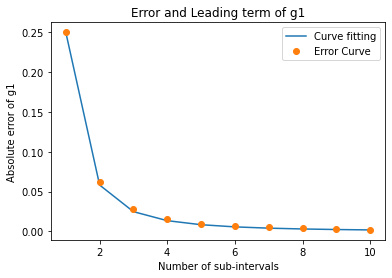

In [32]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.25,2.1,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), merror1, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of g1')
plt.title('Error and Leading term of g1')
plt.legend()
plt.savefig('multi_g1')
plt.show()

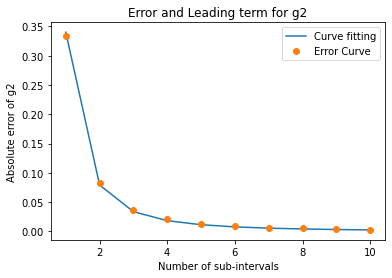

In [33]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.34,2.1,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), merror2, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of g2')
plt.title('Error and Leading term for g2')
plt.legend()
plt.savefig('multi_g2')
plt.show()

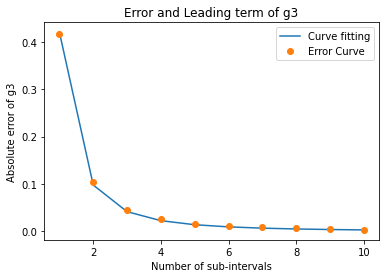

In [34]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.42,2.1,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), merror3, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of g3')
plt.title('Error and Leading term of g3')
plt.legend()
plt.savefig('multi_g3')
plt.show()

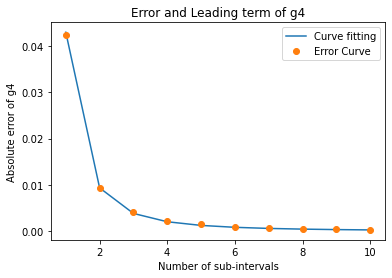

In [35]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.043,2.2,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), merror4, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of g4')
plt.title('Error and Leading term of g4')
plt.legend()
plt.savefig('multi_g4')
plt.show()

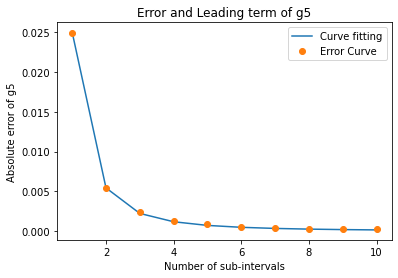

In [36]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.025,2.2,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), merror5, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of g5')
plt.title('Error and Leading term of g5')
plt.legend()
plt.savefig('multi_g5')
plt.show()

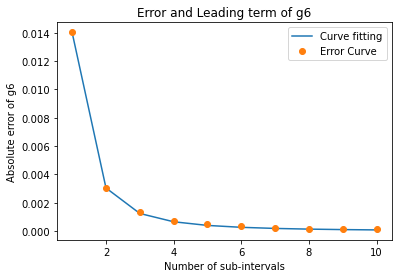

In [37]:
n = np.linspace(1,10,10)
plt.plot(n, leading(0.014,2.2,n), label = 'Curve fitting')

plt.plot(np.linspace(1,10, 10), merror6, 'o', label = 'Error Curve')
plt.xlabel('Number of sub-intervals')
plt.ylabel('Absolute error of g6')
plt.title('Error and Leading term of g6')
plt.legend()
plt.savefig('multi_g6')
plt.show()